# Bank Loan Classification with XGBoost

**Attribute Information**:
1. ID                  (int)
2. Age                 (in Years (int))
3. Experience          (in Years (int))
4. Income              (int)
5. ZIP Code            (int)
6. Family              (Family size of the customer (int))
7. CCAvg               (Avg. spending on credit cards per month ($000) )
8. Education           ( 1: Undergrad; 2: Graduate; 3: Advanced/Professional )
9. Mortgage            (int)
10. Personal Loan      (binary)
11. Securities Account (binary)
12. CD Account         (certificate of deposit (CD) account (binary))
13. Online             (Does the customer use internet banking facilities? (binary))
14. CreditCard         (Does the customer uses a credit card issued by the bank? (binary))

In [1]:
import numpy as np 
np.random.seed(42)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style({'legend.frameon':True})
sns.set(font_scale=1.)

In [2]:
df = pd.read_csv('UniversalBank.csv')
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [3]:
df.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [5]:
df = df.drop(['ID'], axis = 1)

In [6]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

**Observation**: Distribution of target classes is not balanced. 

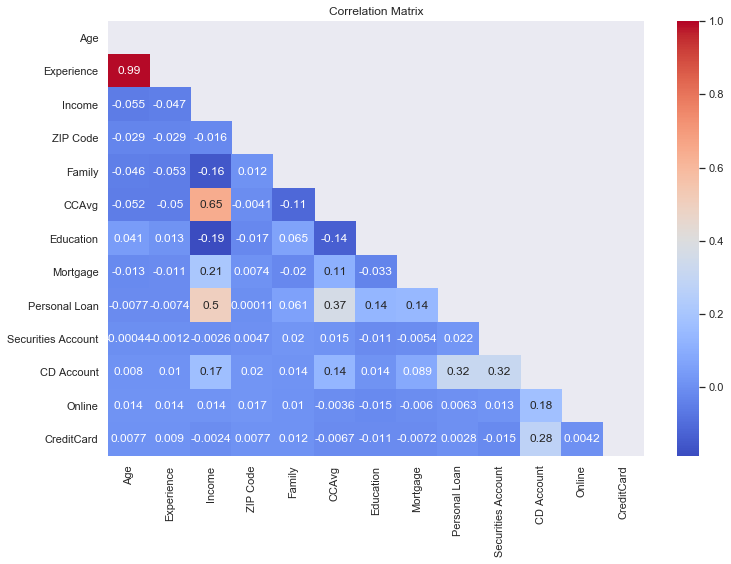

In [7]:
# Correlation matrix

corr = df.corr()
mask = np.zeros_like(corr, dtype=np.bool)   #No need to see both halfs of the correlation matrix
mask[np.triu_indices_from(mask)] = True 

plt.figure(figsize=(12,8))
sns.heatmap(corr,mask = mask, annot=True, cmap = "coolwarm") 
plt.title('Correlation Matrix')
plt.show()

**Observations**: The 'Experience' attribute has a strong correlation with age (this makes intuitive sense). Looking at 'Personal Loan' there is moderate correlation with 'Income' and 'CCAvg'.

In [8]:
df = df.drop(['Age', 'ZIP Code'], axis = 1)

In [9]:
X = df.drop(['Personal Loan'], axis = 1)
y = df['Personal Loan'].values

# One-hot encoding
df = pd.get_dummies(df, drop_first = True)

In [10]:
df.head()

,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,49,4,1.6,1,0,0,1,0,0,0
1,19,34,3,1.5,1,0,0,1,0,0,0
2,15,11,1,1.0,1,0,0,0,0,0,0
3,9,100,1,2.7,2,0,0,0,0,0,0
4,8,45,4,1.0,2,0,0,0,0,0,1


## Data preprocessing

### Splitting

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [13]:
X_train = X_train.reset_index(drop = True)
X_test = X_test.reset_index(drop = True)

### Normalizing

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
## Scale the numeric attributes
scaler = StandardScaler()
scaler.fit(X_train.iloc[:,:5])

X_train.iloc[:,:5] = scaler.transform(X_train.iloc[:,:5])
X_test.iloc[:,:5] = scaler.transform(X_test.iloc[:,:5])

C:\Users\Anthony\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
__main__:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
__main__:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.


## Training : XGBoost

In [16]:
def printSKClassificationReport(y_test, y_pred):
    print ("")
    print ("Classification Report: ")
    print (classification_report(y_test, y_pred))
    print ("")
    print ("Accuracy Score: ", accuracy_score(y_test, y_pred))

In [17]:
import xgboost as xgb

In [18]:
clf_xgb = xgb.XGBClassifier()
clf_xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [19]:
y_pred = clf_xgb.predict(X_test)

In [20]:
from sklearn.metrics import classification_report, accuracy_score

In [21]:
printSKClassificationReport(y_test, y_pred)


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.98      0.93      0.96       105

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.99      0.97      0.98      1000
weighted avg       0.99      0.99      0.99      1000


Accuracy Score:  0.991


## Bayesian optimization: XGBoost

In [22]:
from bayes_opt import BayesianOptimization

In [23]:
dtrain = xgb.DMatrix(X_train, label = y_train)
dtest = xgb.DMatrix(X_test)

In [24]:
def XGB_CV(max_depth, gamma, colsample_bytree):
    params = {'objective' : 'binary:logistic',
              'eval_metric': 'auc',
              'max_depth': int(max_depth),
              'subsample': 0.8,
              'eta': 0.1,
              'gamma': gamma,
              'colsample_bytree': colsample_bytree}
    # Used around 100 boosting rounds in the full model
    cv_result = xgb.cv(params, dtrain, num_boost_round=100, nfold=3)    
    
    # Bayesian optimization only knows how to maximize, not minimize, so return the negative CV result
    return cv_result['test-auc-mean'].iloc[-1]

In [25]:
XGB_BO = BayesianOptimization(XGB_CV, {'max_depth': (2, 7), 
                                       'gamma': (0, 1),
                                       'colsample_bytree': (0.3, 1)})

In [26]:
XGB_BO.maximize(init_points=3, n_iter=7, acq='ei')

|   iter    |  target   | colsam... |   gamma   | max_depth |
-------------------------------------------------------------
|  1        |  0.9933   |  0.7771   |  0.3026   |  2.928    |
|  2        |  0.9922   |  0.5121   |  0.8362   |  2.042    |
|  3        |  0.9957   |  0.8058   |  0.6484   |  3.805    |
|  4        |  0.9961   |  0.9387   |  1.0      |  7.0      |
|  5        |  0.996    |  0.9972   |  0.00303  |  6.986    |
|  6        |  0.991    |  0.3294   |  0.01097  |  6.998    |
|  7        |  0.9961   |  0.9996   |  0.9853   |  6.678    |
|  8        |  0.9963   |  0.9976   |  0.9592   |  6.982    |
|  9        |  0.9962   |  0.9967   |  0.9739   |  6.884    |
|  10       |  0.9962   |  0.9965   |  0.9932   |  6.84     |


### Print best combination of parameters of target value

In [27]:
print(XGB_BO.max)
params = XGB_BO.max['params']

{'target': 0.9962626666666666, 'params': {'colsample_bytree': 0.9976256548087754, 'gamma': 0.959163323633612, 'max_depth': 6.9824935541563535}}


In [28]:
params['max_depth'] = int(params['max_depth'])
params['objective'] = 'binary:logistic'

In [29]:
xgb_model = xgb.train(params, dtrain)

In [30]:
# Predict on testing and training set
y_pred = xgb_model.predict(dtest)

Need to convert y_pred to binary values since XGBoost outputs are logistic probabilities.

In [31]:
y_pred = y_pred > 0.5        # Set threshold
y_pred = y_pred.astype(int)

In [32]:
printSKClassificationReport(y_test, y_pred)


Classification Report: 
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       895
           1       0.97      0.92      0.95       105

   micro avg       0.99      0.99      0.99      1000
   macro avg       0.98      0.96      0.97      1000
weighted avg       0.99      0.99      0.99      1000


Accuracy Score:  0.989


### Feature importance

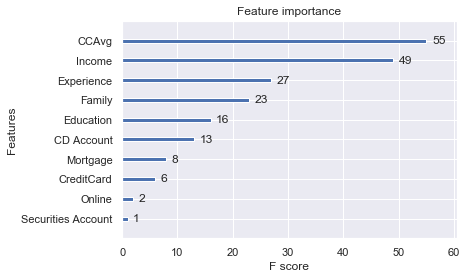

In [33]:
xgb.plot_importance(xgb_model)

**Observations**: The ranking appears consistent with the correlation matrix in terms of its association with 'Personal Loan' attribute.